In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import chesspi_utils
from matplotlib import pyplot as plt
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import glob
import os

In [3]:
board_images_path = "boardimages"
label_list = ["Bishop", "Blank", "King", "Knight", "Pawn", "Queen", "Rook"]
image_size = 100
crop_ratio = 0.05

In [4]:
blindfold_list = glob.glob(f"{board_images_path}/*Blind*")
for file in blindfold_list:
    os.remove(file)

In [5]:
x, y = chesspi_utils.create_training_dataset(board_images_path, label_list, image_size, crop_ratio)

In [6]:
x.shape

(69760, 100, 100)

In [7]:
y.shape

(69760, 1)

In [8]:
x_2d = x.reshape(x.shape[0], -1)

In [9]:
x_2d.shape

(69760, 10000)

In [28]:
clf = RandomForestClassifier(n_estimators= 20, max_depth=30, random_state=0)

In [29]:
clf.fit(x_2d, y)

/tmp/ipykernel_9101/3042772210.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_2d, y)


RandomForestClassifier(max_depth=30, n_estimators=20, random_state=0)

In [30]:
clf.score(x_2d, y)

0.9998996559633028

In [111]:
x_test = cv2.resize(cv2.imread("images/test_knight.png"), (100,100))

In [114]:
type(x_test)

numpy.ndarray

In [115]:
x_text_1d = x_test.reshape(1, -1)

In [117]:
x_text_1d.shape

(1, 30000)

In [118]:
clf.predict(x_text_1d)

array([3])

In [135]:
x_test = chesspi_utils.read_and_resize_square("/home/ali/projects/Chesspi/images/test_knight.png")

In [136]:
clf.predict(x_test)

array([3])

In [134]:
y

[0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6]

In [133]:
label_list

['Bishop', 'Blank', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [142]:
path = "images/test"
image_name = "/home/ali/projects/Chesspi/images/chess_board4.png"
image_number = 1

In [143]:
chesspi_utils.extract_squares_form_starting_position(path, image_name, image_number)

In [148]:
x_test, y_test = chesspi_utils.construct_dataset(path, label_list)

In [149]:
x_test = x_test.reshape(22,-1)

In [151]:
x_test.shape

(22, 30000)

In [152]:
clf.predict(x_test)

array([5, 0, 2, 4, 4, 4, 5, 5, 3, 2, 3, 4, 4, 4, 4, 4, 4, 5, 6, 6, 5, 4])

In [153]:
y_test

[0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6]

In [154]:
img_path = "/home/ali/projects/Chesspi/images/chess_board3.png"

In [171]:
img_size = 100

In [172]:
crop_ratio = 0.05

In [236]:
x = chesspi_utils.create_dataset_from_board_single_image(img_path, img_size, crop_ratio)

In [237]:
x_2d = np.reshape(x, (64,-1))

In [238]:
x_2d.shape

(64, 30000)

In [226]:
label_list = ["Blank", "Rook", "Knight", "Bishop", "Queen", "King", "Pawn"]

In [232]:
y = chesspi_utils.create_labels_for_starting_position(label_list)

In [251]:
clf = RandomForestClassifier(max_depth=4, random_state=0)

In [252]:
clf.fit(x_2d, y)

/tmp/ipykernel_15318/3042772210.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_2d, y)


RandomForestClassifier(max_depth=4, random_state=0)

In [253]:
clf.predict(x_2d)

array([1., 2., 3., 4., 5., 3., 2., 1., 6., 6., 6., 6., 6., 6., 6., 6., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 6., 6.,
       6., 6., 6., 6., 6., 1., 2., 3., 4., 5., 3., 2., 1.])

In [262]:
img_path = "/home/ali/projects/Chesspi/images/Chess_boards/chess_board.png"

In [274]:
x_test = chesspi_utils.create_dataset_from_board_single_image(img_path, img_size, crop_ratio)

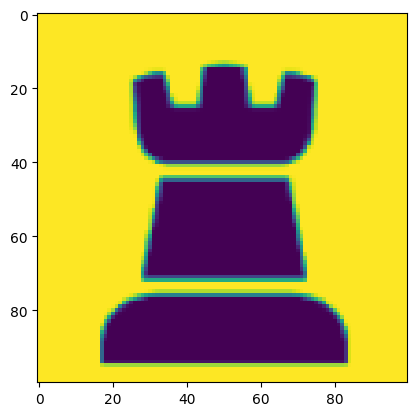

In [266]:
plt.imshow(x_test[0])

In [275]:
x_test_2d = np.reshape(x_test, (64,-1))

In [276]:
clf.predict(x_test_2d)

array([1., 2., 3., 4., 5., 3., 2., 1., 6., 6., 6., 6., 6., 6., 6., 6., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 6., 6.,
       6., 6., 6., 6., 6., 1., 2., 3., 4., 5., 3., 2., 1.])

In [308]:
path = "/home/ali/projects/Chesspi/images/Chess_boards"

In [320]:
x, y = chesspi_utils.create_training_dataset(path, label_list, img_size, crop_ratio)

In [321]:
x.shape

(320, 100, 100)

In [322]:
x_2d = np.reshape(x, (320, -1))

In [323]:
x_2d.shape

(320, 10000)

In [324]:
y.shape

(320, 1)

In [325]:
clf.fit(x_2d, y)

/tmp/ipykernel_15318/3042772210.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_2d, y)


RandomForestClassifier(max_depth=4, random_state=0)

In [326]:
clf.predict(x_2d)

array([1., 2., 3., 4., 5., 3., 2., 1., 6., 6., 6., 6., 6., 6., 6., 6., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 6., 6.,
       6., 6., 6., 6., 6., 1., 2., 3., 4., 5., 3., 2., 1., 1., 2., 3., 4.,
       5., 3., 2., 1., 6., 6., 6., 6., 6., 6., 6., 6., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 6., 6., 6., 6., 6., 6.,
       6., 1., 2., 3., 4., 5., 3., 2., 1., 1., 2., 3., 4., 5., 3., 2., 1.,
       6., 6., 6., 6., 6., 6., 6., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 6., 6., 6., 6., 6., 6., 6., 6., 1., 2., 3.,
       4., 5., 3., 2., 1., 1., 2., 3., 4., 5., 3., 2., 1., 6., 6., 6., 6.,
       6., 6., 6., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [333]:
img_path = "/home/ali/projects/Chesspi/images/Queen/test/test_screenshot.png"

In [334]:
x_test = chesspi_utils.create_dataset_from_board_single_image(img_path, img_size, crop_ratio)

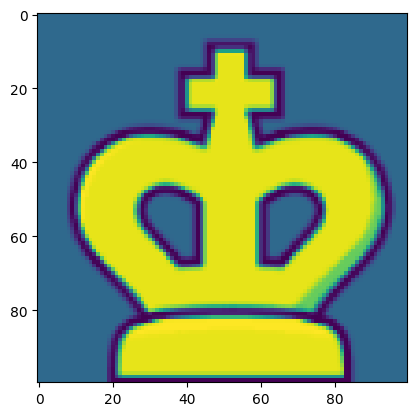

In [339]:
plt.imshow(x_test[60])

In [336]:
x_test_2d = np.reshape(x_test, (64,-1))

In [337]:
clf.predict(x_test_2d)

array([1., 2., 3., 4., 5., 3., 2., 1., 6., 6., 6., 6., 6., 6., 6., 6., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 6., 6.,
       6., 6., 6., 6., 6., 0., 0., 0., 0., 0., 0., 0., 0.])

In [299]:
clf.score(x_2d, y)

1.0

In [304]:
threshold = 0.5

In [305]:
im_bw = cv2.threshold(x_test[0], threshold, 255, cv2.THRESH_BINARY)[1]

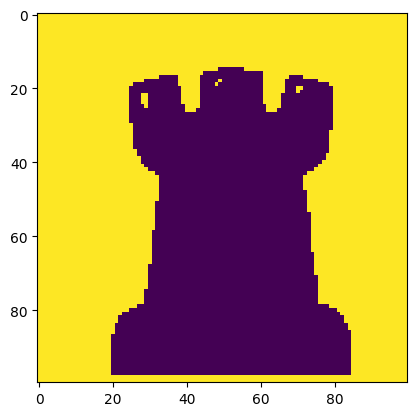

In [307]:
plt.imshow(im_bw)